In [1]:
import pandas as pd
import geopandas as gpd

df = pd.read_stata(r"Z:\Downloads\DHSBirthsGlobal_Share04102024.dta")

# Markdown
- title
- question (1era de la ppt) and ideas to idenfiy
- specification in mind to answer this: y = sum exposure en cada trimestre (in utero + early childhood) + X + delta_j + gamma_t (de nacimiento) + uit
- comparacion DHS y climate
- slides de argnetina
- merge data
- How to handle noise in DHS location?
- How to handle migration? (limit timeframe)

In [7]:
df = df.drop_duplicates(subset=['ID_HH'])
gdf = gpd.GeoDataFrame(df[['ID_HH','LATNUM', 'LONGNUM']], geometry=gpd.points_from_xy(df.LONGNUM, df.LATNUM), crs="epsg:4326") 
# gdf.sample(100_000).to_parquet(r"D:\Downloads\DHSBirthsGlobal_Share04102024.parquet", index=False)

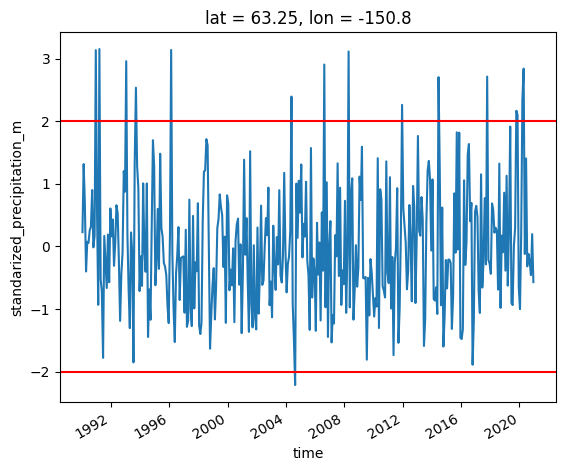

In [99]:
import numpy as np
import matplotlib.pyplot as plt

ds = xr.open_dataset(r"Z:\Laboral\World Bank\Paper - Child mortality and Climate Shocks\Data\Data_out\Climate_shocks.nc")
lat = np.random.choice(ds.lat.values)
lon =  np.random.choice(ds.lon.values)


ds.sel(lat=lat, lon=lon)["standarized_precipitation_m"].plot()
plt.axhline(-2, color="red")
plt.axhline(2, color="red")

In [63]:
ds.time.values[0] - np.timedelta64(365,'D')

numpy.datetime64('1989-01-16T00:00:00.000000000')

In [72]:
ds_selected = ds

Text(1988-12-12T00:00:00.000000000, 3.5, 'Excessive Rain')

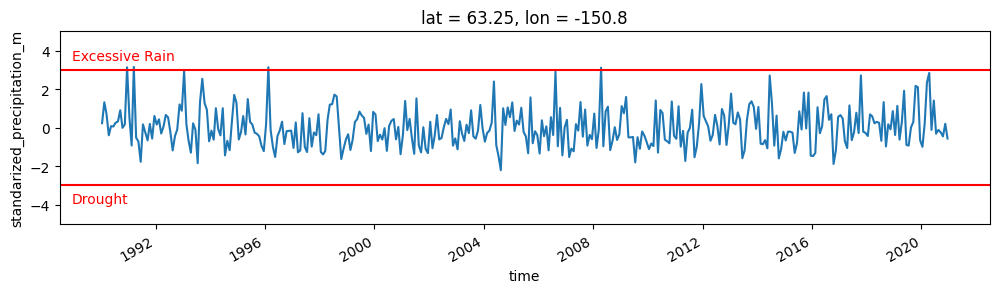

In [152]:

ds.sel(lat=lat, lon=lon)["standarized_precipitation_m"].plot(figsize=(12, 2.5))
# plt.axhline(-3.5, color="red", linestyle="--")
# plt.axhline(3.5, color="red", linestyle="--")
plt.axhline(-3, color="red")
plt.axhline(3, color="red")
plt.ylim(-5, 5)
plt.text(ds.time.values[0] - np.timedelta64(400,'D'), -3.9, "Drought", color="red")
plt.text(ds.time.values[0] - np.timedelta64(400,'D'), 3.5, "Excessive Rain", color="red")

In [107]:
obs_by_cell   = pd.read_excel(r"z:\Laboral\World Bank\Paper - Child mortality and Climate Shocks\Outputs\Resultados\obs_by_cell_and_month.xls")
obs_by_cell_2 = pd.read_excel(r"z:\Laboral\World Bank\Paper - Child mortality and Climate Shocks\Outputs\Resultados\obs_by_cell_2_and_month.xls")
obs_by_cell_3 = pd.read_excel(r"z:\Laboral\World Bank\Paper - Child mortality and Climate Shocks\Outputs\Resultados\obs_by_cell_3_and_month.xls")
obs_by_cell_4 = pd.read_excel(r"z:\Laboral\World Bank\Paper - Child mortality and Climate Shocks\Outputs\Resultados\obs_by_cell_4_and_month.xls")

obs_by_cell = obs_by_cell.set_index("ID_cell")
obs_by_cell_2 = obs_by_cell_2.set_index("ID_cell_2")
obs_by_cell_3 = obs_by_cell_3.set_index("ID_cell_3")
obs_by_cell_4 = obs_by_cell_4.set_index("ID_cell_4")

In [127]:
(cells_df < thresh).sum().sum()

787

In [148]:
n_cells = {}
s_cells = {}
for cells_df in [obs_by_cell_2]:#, obs_by_cell_3, obs_by_cell_4]:
    counts = []
    shares = []
    total = cells_df.count().sum()
    for thresh in [5, 10, 20, 30, 40, 50, 100]:
        count = (cells_df < thresh).sum().sum()
        share = count / total
        counts += [count]
        shares += [share]
    name = cells_df.index.name
    n_cells[name] = counts
    s_cells[name] = shares

In [149]:
cells_df

,month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12
ID_cell_2,,,,,,,,,,,,
-1-10,134.0,108.0,127.0,142.0,148.0,115.0,102.0,102.0,125.0,87.0,80.0,121.0
-1-11,41.0,31.0,44.0,31.0,52.0,35.0,36.0,23.0,32.0,24.0,12.0,25.0
-1-12,109.0,96.0,128.0,121.0,130.0,132.0,113.0,104.0,106.0,92.0,87.0,117.0
-1-13,124.0,106.0,134.0,142.0,139.0,126.0,120.0,121.0,121.0,115.0,111.0,106.0
-1-14,51.0,55.0,44.0,60.0,60.0,49.0,46.0,32.0,46.0,49.0,44.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9-78,182.0,175.0,232.0,198.0,236.0,211.0,190.0,203.0,218.0,219.0,217.0,169.0
9-79,71.0,68.0,64.0,60.0,61.0,70.0,61.0,78.0,59.0,74.0,63.0,68.0
9-8,424.0,401.0,449.0,397.0,322.0,356.0,325.0,301.0,319.0,304.0,249.0,260.0


In [147]:
table = pd.DataFrame().from_dict(s_cells, columns=["Less than 5", "Less than 10", "Less than 20", "Less than 30", "Less than 40", "Less than 50", "Less than 100"], orient="index") * 100
table.to_excel(r"Z:\Laboral\World Bank\Paper - Child mortality and Climate Shocks\Outputs\Resultados\shares_obs_by_cellsize.xlsx")